In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [35]:
df_cases.tail(10)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
24,154,63,74,0,70,103,66,449,44,197,208,0,27,108,1563
25,177,77,92,0,76,131,86,547,51,244,269,0,29,214,1993
26,199,87,100,3,96,146,108,632,58,284,311,2,30,254,2310
27,221,93,104,3,119,172,128,682,65,320,356,2,30,307,2602
28,240,100,122,3,147,189,173,779,72,377,408,2,36,353,3001
29,254,110,127,3,173,208,177,851,85,427,476,4,40,410,3345
30,267,130,141,4,200,226,194,931,99,478,534,4,41,457,3706
31,288,139,144,4,227,231,209,984,102,512,577,4,41,499,3961
32,296,149,152,4,239,243,210,1094,112,547,621,4,42,516,4229
33,312,160,155,4,255,259,223,1166,122,575,700,4,43,586,4564


In [36]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
24,14624,1563,47
25,15895,1993,69
26,17007,2310,97
27,18128,2602,126
28,19535,3001,172
29,20798,3345,218
30,23143,3706,220
31,24036,3961,222
32,25022,4229,296
33,26226,4565,366


## National Statistics

### total number of cases over time

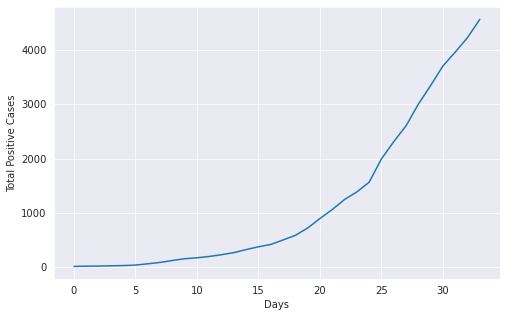

In [5]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

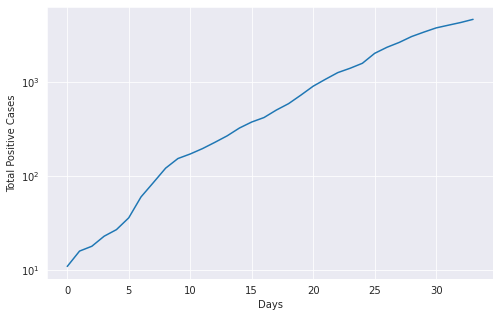

In [6]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

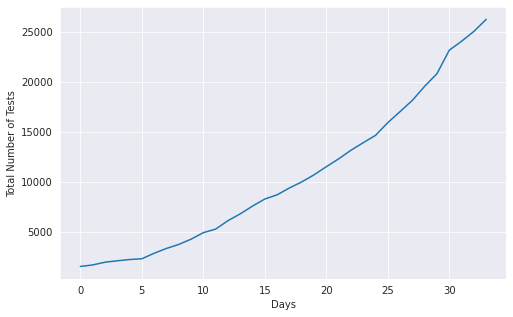

In [7]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [8]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

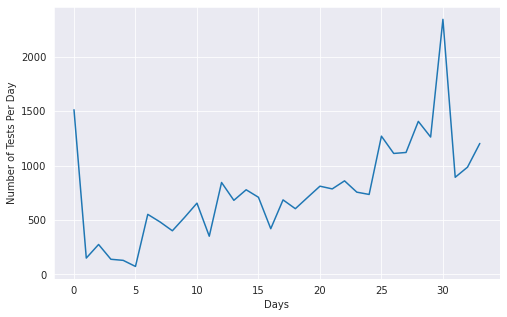

In [9]:
num_test_per_day.plot(figsize=(8, 5))
plt.ylabel('Number of Tests Per Day')
plt.xlabel('Days')
plt.show()

### Total number of deaths over time

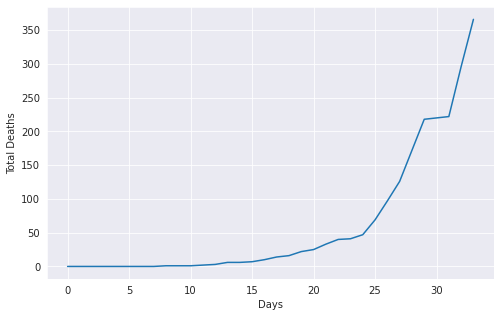

In [10]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

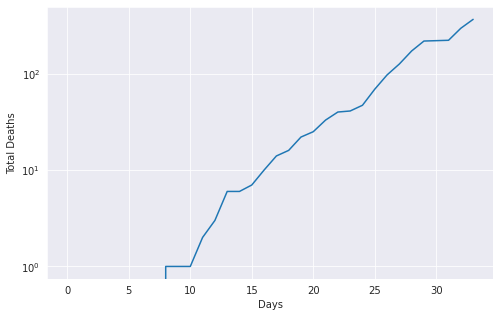

In [11]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

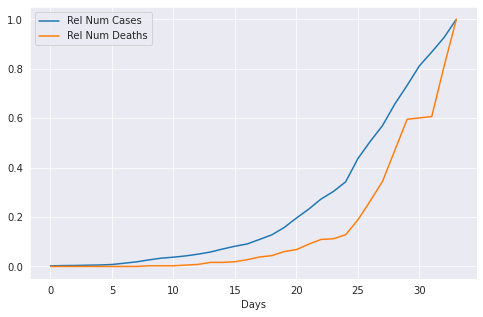

In [12]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

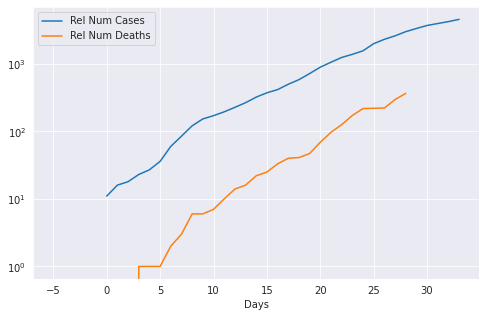

In [38]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 8-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day percentage rise in cases?

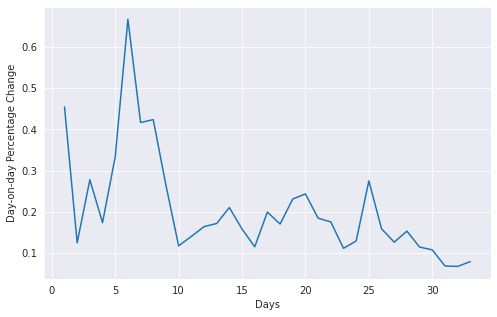

In [14]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

In [15]:
df_total['Total Positive Cases'].pct_change()[-7:]

27    0.126407
28    0.153344
29    0.114628
30    0.107922
31    0.068807
32    0.067660
33    0.079451
Name: Total Positive Cases, dtype: float64

In [16]:
df_total['Total Positive Cases'].pct_change().describe()

count    33.000000
mean      0.206424
std       0.128835
min       0.067660
25%       0.125000
50%       0.170341
75%       0.243394
max       0.666667
Name: Total Positive Cases, dtype: float64

### What is the day-on-day percentage rise in deaths?

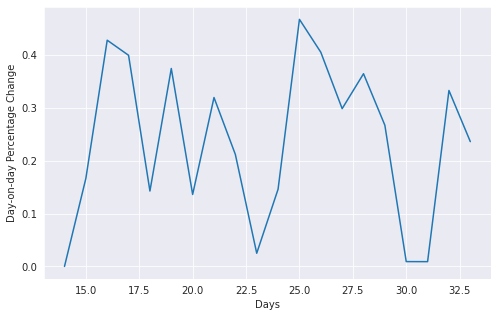

In [17]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

In [18]:
death_pct_change[-7:]

27    0.298969
28    0.365079
29    0.267442
30    0.009174
31    0.009091
32    0.333333
33    0.236486
Name: Total Deaths, dtype: float64

In [19]:
death_pct_change.describe()

count    20.000000
mean      0.237319
std       0.152052
min       0.000000
25%       0.141234
50%       0.251964
75%       0.367560
max       0.468085
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

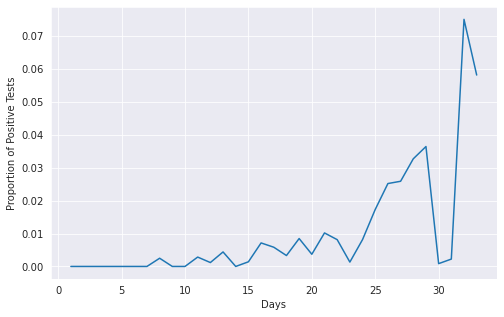

In [20]:
prop_pos = (df_total['Total Deaths'].diff() / df_total['Total Tests'].diff()).dropna()

prop_pos.plot(figsize=(8, 5))
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.show()

## Regional Statistics

### Num Cases Per Region

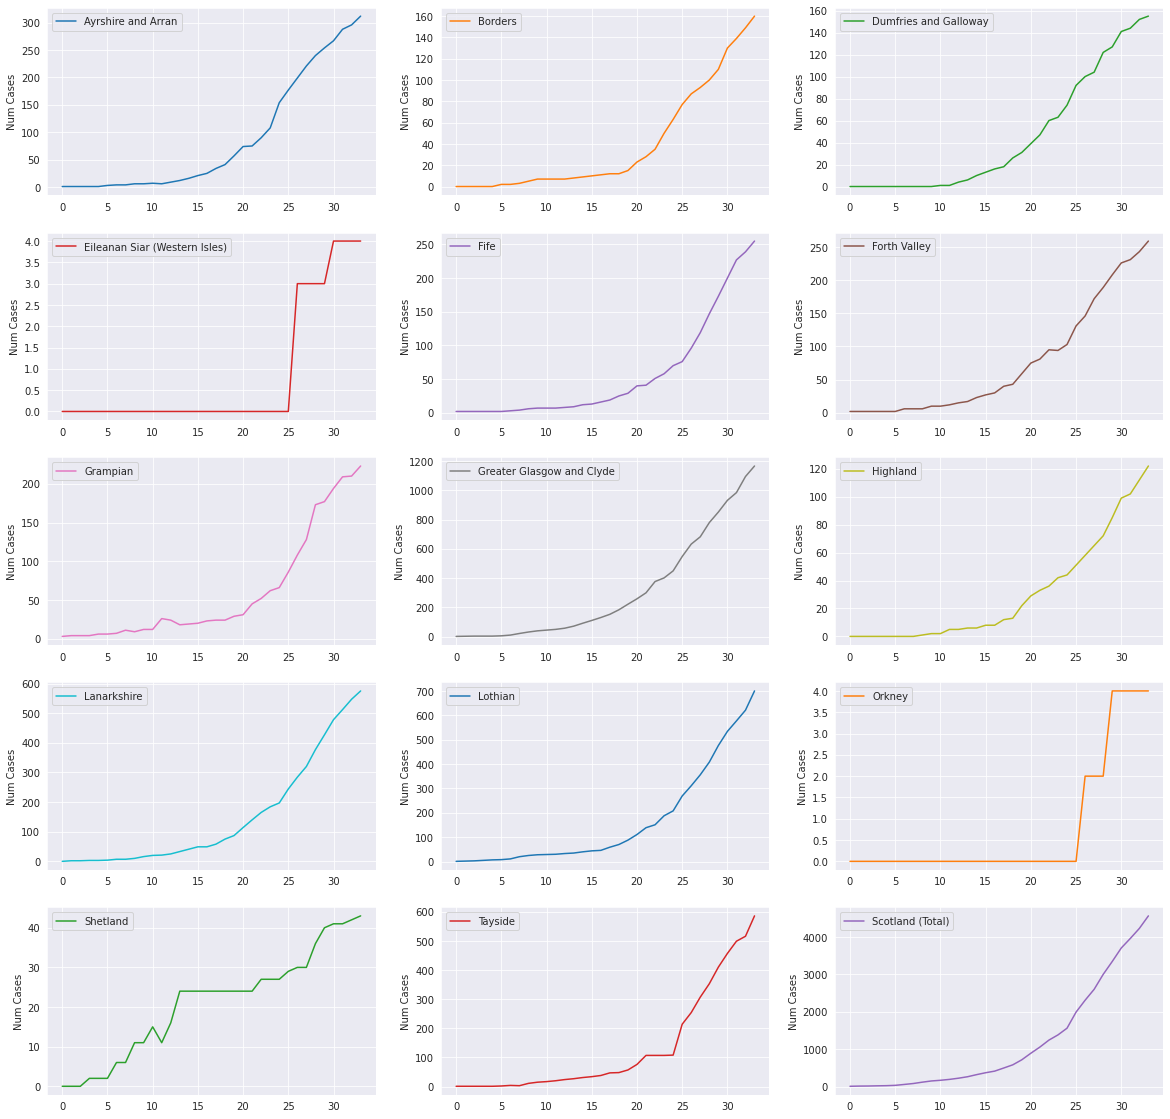

In [21]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

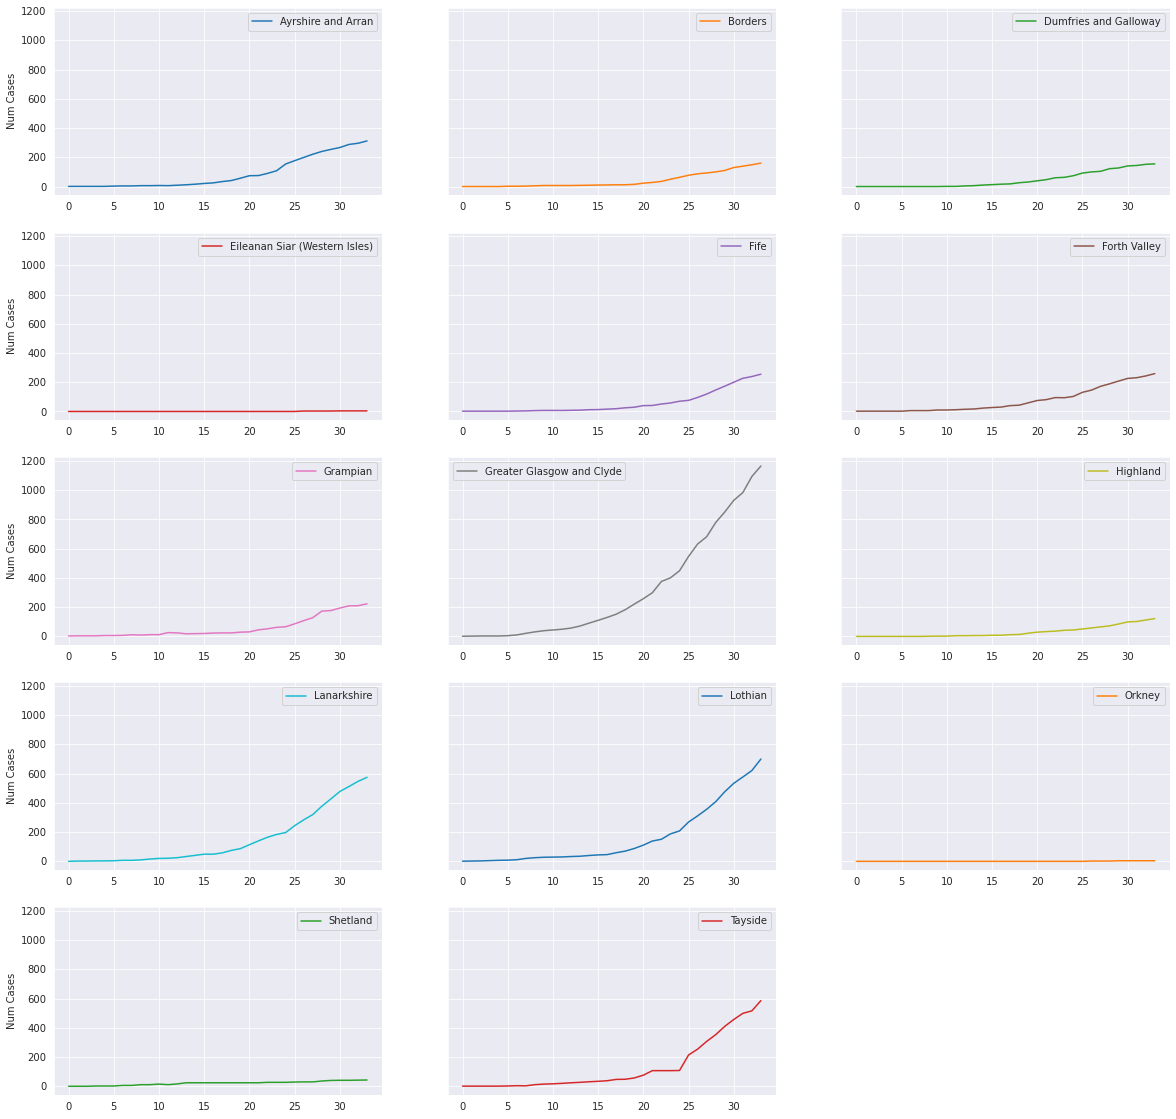

In [22]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [23]:
194 / 178

1.0898876404494382

In [24]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [25]:
df_cases_rel = df_cases / df_pop.values.T

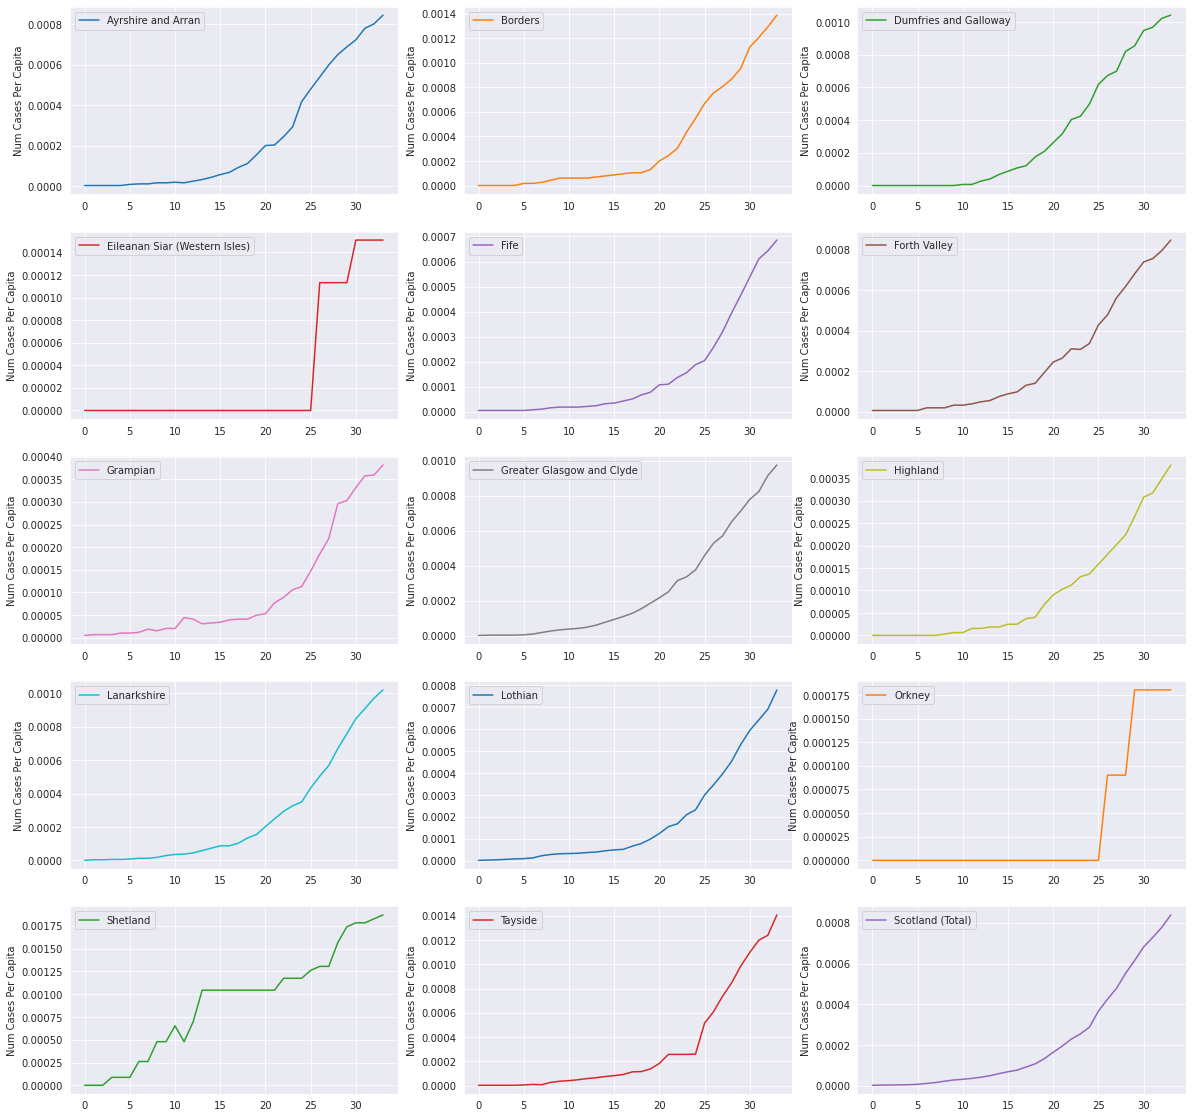

In [26]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

- Same again but sharing the y axis for comparison

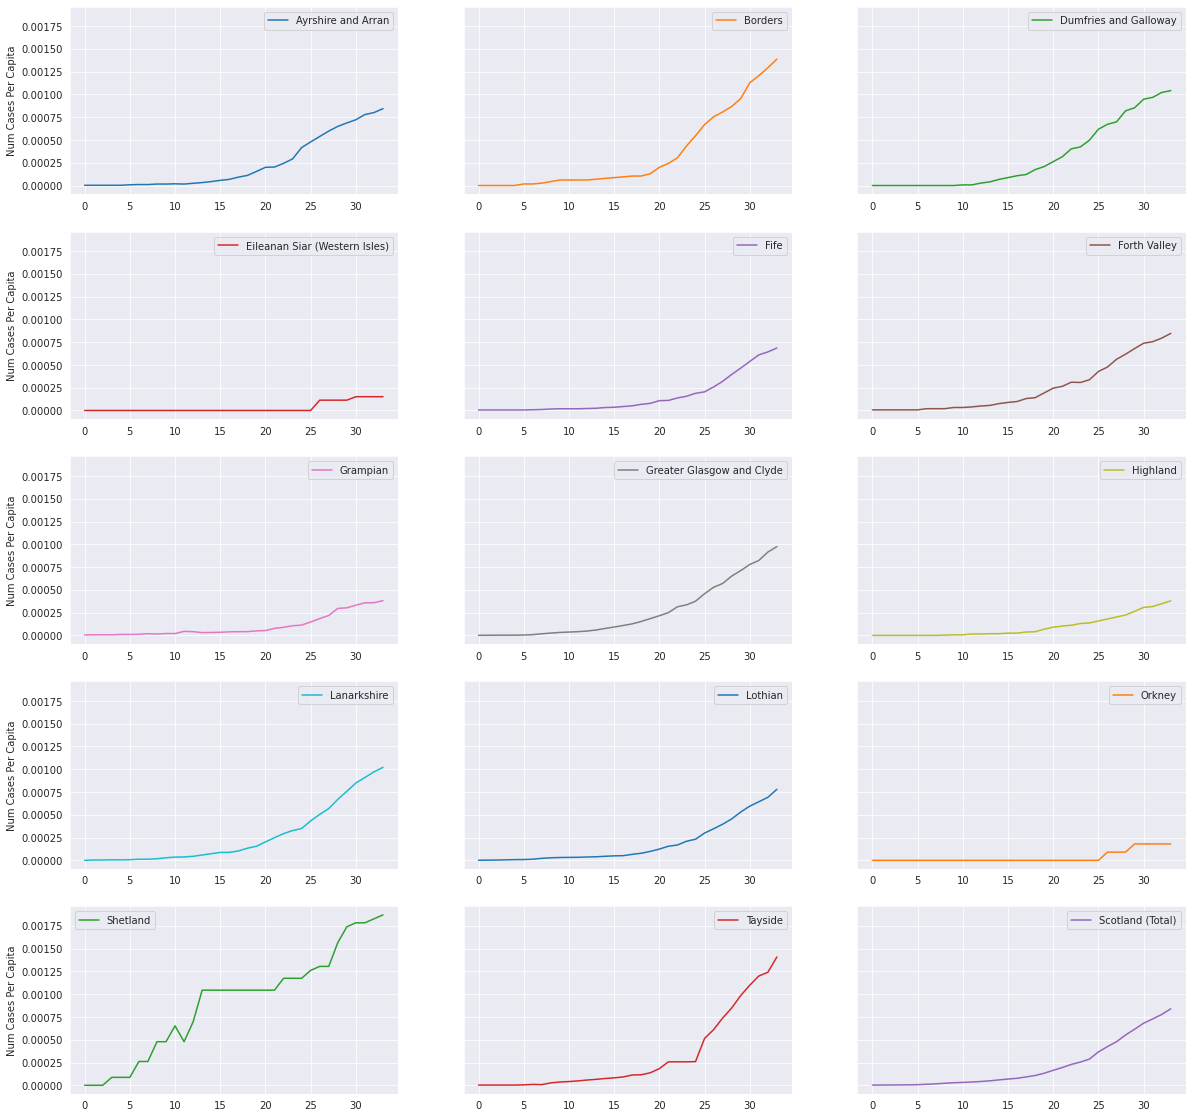

In [27]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

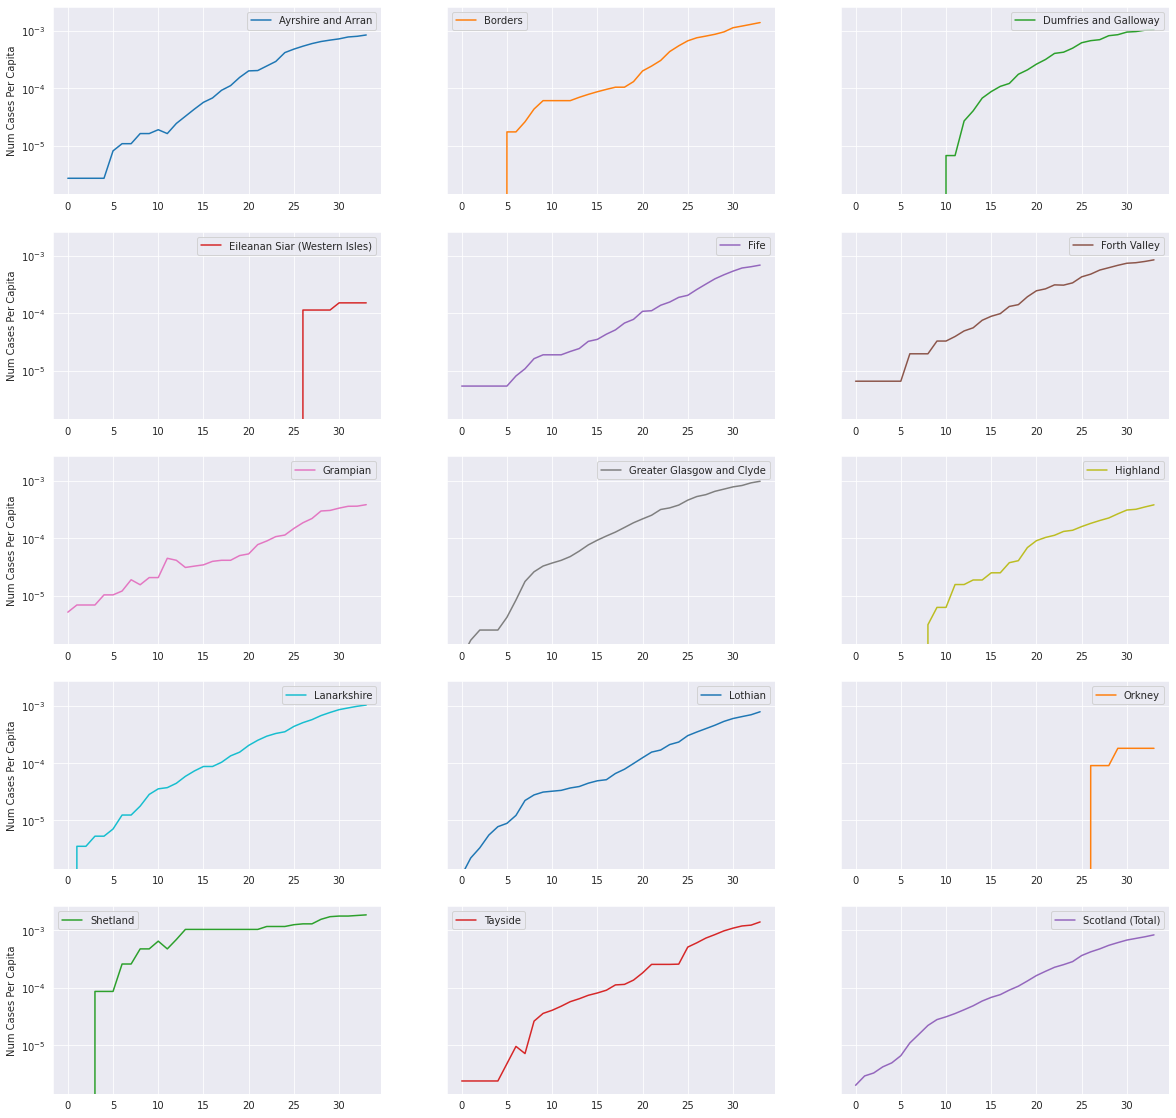

In [28]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

In [29]:
df_cases_rel.idxmax(1)

0     Forth Valley
1         Grampian
2         Grampian
3         Shetland
4         Shetland
5         Shetland
6         Shetland
7         Shetland
8         Shetland
9         Shetland
10        Shetland
11        Shetland
12        Shetland
13        Shetland
14        Shetland
15        Shetland
16        Shetland
17        Shetland
18        Shetland
19        Shetland
20        Shetland
21        Shetland
22        Shetland
23        Shetland
24        Shetland
25        Shetland
26        Shetland
27        Shetland
28        Shetland
29        Shetland
30        Shetland
31        Shetland
32        Shetland
33        Shetland
dtype: object

In [30]:
df_cases.drop(columns='Scotland (Total)').idxmax(1)

0                      Grampian
1                      Grampian
2                      Grampian
3                       Lothian
4                       Lothian
5                       Lothian
6                       Lothian
7     Greater Glasgow and Clyde
8     Greater Glasgow and Clyde
9     Greater Glasgow and Clyde
10    Greater Glasgow and Clyde
11    Greater Glasgow and Clyde
12    Greater Glasgow and Clyde
13    Greater Glasgow and Clyde
14    Greater Glasgow and Clyde
15    Greater Glasgow and Clyde
16    Greater Glasgow and Clyde
17    Greater Glasgow and Clyde
18    Greater Glasgow and Clyde
19    Greater Glasgow and Clyde
20    Greater Glasgow and Clyde
21    Greater Glasgow and Clyde
22    Greater Glasgow and Clyde
23    Greater Glasgow and Clyde
24    Greater Glasgow and Clyde
25    Greater Glasgow and Clyde
26    Greater Glasgow and Clyde
27    Greater Glasgow and Clyde
28    Greater Glasgow and Clyde
29    Greater Glasgow and Clyde
30    Greater Glasgow and Clyde
31    Gr

### Log Growth Curves for Each Region

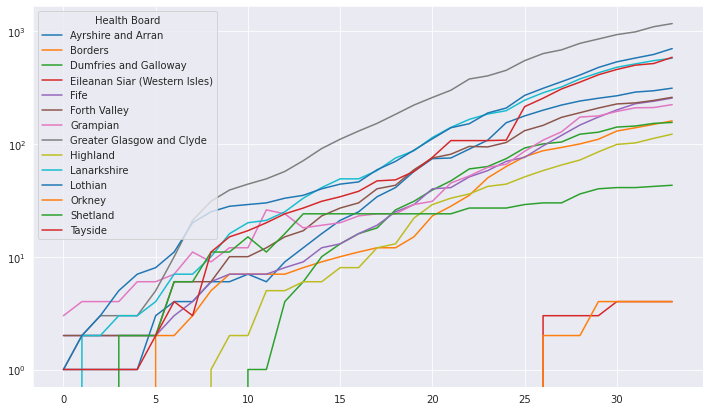

In [31]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

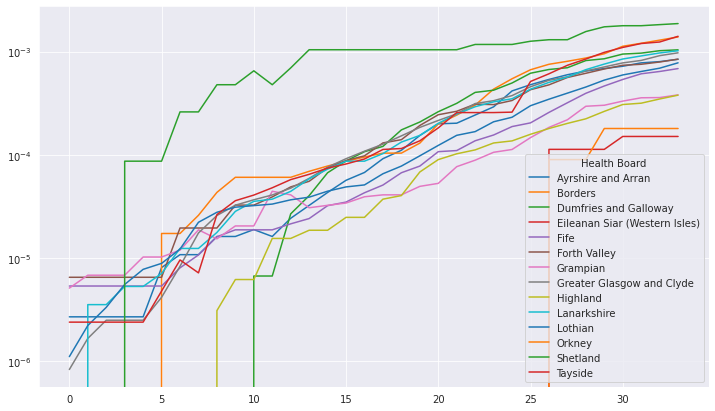

In [32]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()